In [220]:
import numpy as np
import pandas as pd
import os

***FINAL DATA CLEANING***

In [196]:
#import clean and cat data
directory = os.getcwd()
data_clean = pd.read_csv(directory + '/EMS_2017_2018_clean.csv', sep=',') 
data_cat = pd.read_csv(directory + '/EMS_2017_2018_cat.csv', sep=',') 

#create data work
data_wrk = data_cat.drop(['Unnamed: 0', 'Unnamed: 0.1', "VALID_DISPATCH_RSPNS_TIME_INDC", "VALID_INCIDENT_RSPNS_TIME_INDC", "SPECIAL_EVENT_INDICATOR", "STANDBY_INDICATOR", "ZIPCODE_mv", "PRECINCT_mv", "CITYCOUNCILDISTRICT_mv", "COMMUNITYDISTRICT_mv", "COMMUNITYSCHOOLDISTRICT_mv", "CONGRESSIONALDISTRICT_mv" ], axis = 1)
data_wrk = data_wrk.drop([1094377,1241464],axis=0) #drop where Borough is unknown

#create cat_values df
a = data_clean[["CAD_INCIDENT_ID","INITIAL_CALL_TYPE", "HELD_INDICATOR", "BOROUGH", "INCIDENT_DISPATCH_AREA", "TRANSFER_INDICATOR"]]
b = data_cat[["INITIAL_CALL_TYPE", "HELD_INDICATOR", "BOROUGH", "INCIDENT_DISPATCH_AREA", "TRANSFER_INDICATOR"]] 
frames = [a,b]
cat_values = pd.concat(frames, axis = 1)

In [197]:
data_wrk[:10]

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR
0,183654386,12/31/2018 11:59:46 PM,14,2,12/31/2018 11:59:54 PM,8,01/01/2019 12:00:51 AM,01/01/2019 12:07:27 AM,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0
1,183654358,12/31/2018 11:49:42 PM,92,2,12/31/2018 11:50:07 PM,25,12/31/2018 11:50:27 PM,12/31/2018 11:55:10 PM,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0
2,183654307,12/31/2018 11:38:46 PM,92,2,12/31/2018 11:39:11 PM,25,12/31/2018 11:39:44 PM,12/31/2018 11:41:00 PM,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0
3,183654254,12/31/2018 11:24:58 PM,81,6,12/31/2018 11:25:09 PM,11,12/31/2018 11:25:37 PM,12/31/2018 11:32:03 PM,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0
4,183654246,12/31/2018 11:23:35 PM,84,7,12/31/2018 11:23:45 PM,10,12/31/2018 11:23:57 PM,12/31/2018 11:38:33 PM,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0
5,183654212,12/31/2018 11:12:16 PM,30,7,12/31/2018 11:12:36 PM,20,12/31/2018 11:12:45 PM,12/31/2018 11:23:38 PM,682.0,662.0,0,1,12,11218.0,72.0,39.0,307.0,15.0,9.0,0
6,183654207,12/31/2018 11:11:42 PM,92,2,12/31/2018 11:11:57 PM,15,12/31/2018 11:12:22 PM,12/31/2018 11:22:05 PM,623.0,608.0,0,1,12,11217.0,88.0,33.0,302.0,15.0,8.0,0
7,183654202,12/31/2018 11:10:33 PM,73,3,12/31/2018 11:10:50 PM,17,12/31/2018 11:12:07 PM,12/31/2018 11:17:52 PM,439.0,422.0,0,1,12,11238.0,78.0,35.0,302.0,13.0,8.0,0
8,183654194,12/31/2018 11:08:20 PM,30,7,12/31/2018 11:08:54 PM,34,12/31/2018 11:09:23 PM,12/31/2018 11:27:31 PM,1151.0,1117.0,0,1,12,11205.0,88.0,35.0,302.0,13.0,8.0,0
9,183654183,12/31/2018 11:06:25 PM,39,3,12/31/2018 11:06:41 PM,16,12/31/2018 11:07:07 PM,12/31/2018 11:17:39 PM,674.0,658.0,0,1,12,11238.0,79.0,35.0,303.0,13.0,8.0,0


In [198]:
data_wrk["INCIDENT_DATETIME"] = pd.to_datetime(data_wrk["INCIDENT_DATETIME"])
data_wrk["FIRST_ASSIGNMENT_DATETIME"] = pd.to_datetime(data_wrk["FIRST_ASSIGNMENT_DATETIME"])
data_wrk["FIRST_ACTIVATION_DATETIME"] = pd.to_datetime(data_wrk["FIRST_ACTIVATION_DATETIME"])
data_wrk["FIRST_ON_SCENE_DATETIME"] = pd.to_datetime(data_wrk["FIRST_ON_SCENE_DATETIME"])

In [200]:
data_wrk.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0


In [260]:
data_wrk["INCIDENT_Hour"]=data_wrk["INCIDENT_DATETIME"].dt.hour
data_wrk["INCIDENT_Month"]=data_wrk["INCIDENT_DATETIME"].dt.month

data_wrk["FIRST_ASSIGNMENT_Hour"]=data_wrk["FIRST_ASSIGNMENT_DATETIME"].dt.hour
data_wrk["FIRST_ASSIGNMENT_Month"]=data_wrk["FIRST_ASSIGNMENT_DATETIME"].dt.month

data_wrk["FIRST_ACTIVATION_Hour"]=data_wrk["FIRST_ACTIVATION_DATETIME"].dt.hour
data_wrk["FIRST_ACTIVATION_Month"]=data_wrk["FIRST_ACTIVATION_DATETIME"].dt.month

data_wrk["FIRST_ON_SCENE_Hour"]=data_wrk["FIRST_ON_SCENE_DATETIME"].dt.hour
data_wrk["FIRST_ON_SCENE_Month"]=data_wrk["FIRST_ON_SCENE_DATETIME"].dt.month

In [261]:
data_wrk.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0,23,12,23,12,0,1,0,1
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,23,12,23,12,23,12,23,12
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0,23,12,23,12,23,12,23,12
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0,23,12,23,12,23,12,23,12
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0,23,12,23,12,23,12,23,12


In [262]:
data_wrk.to_csv("EMS_2017_2018_cat_final.csv", date_format='%Y-%m-%d %H:%M:%S', index=False)

***IMPORT CLEAN DATA FILE*** 

In [263]:
data = pd.read_csv(directory + '/EMS_2017_2018_cat_final.csv', sep=',') 

In [264]:
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0,23,12,23,12,0,1,0,1
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,23,12,23,12,23,12,23,12
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0,23,12,23,12,23,12,23,12
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0,23,12,23,12,23,12,23,12
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0,23,12,23,12,23,12,23,12


In [218]:
pd.DatetimeIndex(data['INCIDENT_DATETIME']).month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             3,  1, 11, 11, 11, 11, 11, 11, 11,  6],
           dtype='int64', name='INCIDENT_DATETIME', length=2730670)

In [219]:
pd.DatetimeIndex(data['FIRST_ON_SCENE_DATETIME']).hour

Int64Index([ 0, 23, 23, 23, 23, 23, 23, 23, 23, 23,
            ...
             8, 20, 14, 14, 10, 16, 16, 14, 14,  9],
           dtype='int64', name='FIRST_ON_SCENE_DATETIME', length=2730670)

In [223]:
cat_values.to_csv("cat_values.csv",index=False)

In [224]:
cat_values = pd.read_csv(directory + '/cat_values.csv', sep=',') 

***EXPLORATORY ANALYSIS***

***Bronx is Borough 0***

In [226]:
data[data["BOROUGH"]==4]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
30066,30066,991735,181321031,05/12/2018 07:00:10 AM,42,3,05/12/2018 07:00:20 AM,0,10,05/12/2018 07:01:12 AM,05/12/2018 07:07:40 AM,0,450.0,440.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
31061,31061,1022674,181250891,05/05/2018 05:23:33 AM,76,4,05/05/2018 05:23:41 AM,0,8,05/05/2018 05:24:05 AM,05/05/2018 05:28:45 AM,0,312.0,304.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
36329,36329,1192048,180833010,03/24/2018 05:56:58 PM,81,6,03/24/2018 05:57:08 PM,0,10,03/24/2018 05:57:18 PM,03/24/2018 06:01:32 PM,0,274.0,264.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
42066,42066,1377630,180373403,02/06/2018 05:53:27 PM,30,7,02/06/2018 05:53:49 PM,0,22,02/06/2018 05:54:02 PM,02/06/2018 05:57:11 PM,0,224.0,202.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
43710,43710,1432553,180242664,01/24/2018 03:13:54 PM,14,2,01/24/2018 03:14:03 PM,0,9,01/24/2018 03:15:25 PM,01/24/2018 03:22:09 PM,0,495.0,486.0,0,4,12,10301.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
48991,48991,1610639,173464053,12/12/2017 09:23:26 PM,24,2,12/12/2017 09:23:33 PM,0,7,12/12/2017 09:23:58 PM,12/12/2017 09:35:18 PM,0,712.0,705.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
75418,75418,2475927,171350212,05/15/2017 01:27:22 AM,92,2,05/15/2017 01:27:40 AM,0,18,05/15/2017 01:27:57 AM,05/15/2017 01:37:43 AM,0,621.0,603.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
84032,84032,2754465,170640135,03/05/2017 12:48:12 AM,61,4,03/05/2017 12:48:18 AM,0,6,03/05/2017 12:48:42 AM,03/05/2017 01:03:02 AM,0,890.0,884.0,0,4,12,10314.0,121.0,50.0,502.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
84661,84661,2774436,170583222,02/27/2017 06:54:11 PM,13,3,02/27/2017 06:54:46 PM,0,35,02/27/2017 06:54:51 PM,02/27/2017 07:04:46 PM,0,635.0,600.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
88061,88061,2885917,170293169,01/29/2017 07:52:56 PM,8,1,01/29/2017 07:53:04 PM,0,8,01/29/2017 07:53:20 PM,01/29/2017 08:00:55 PM,0,479.0,471.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0


In [227]:
data[data["CAD_INCIDENT_ID"]==183654379]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
762930,762930,7,183654379,12/31/2018 11:57:04 PM,14,2,12/31/2018 11:57:16 PM,0,12,12/31/2018 11:58:13 PM,12/31/2018 11:57:37 PM,0,33.0,21.0,0,0,2,10465.0,45.0,13.0,210.0,8.0,14.0,0,0,0,10472.0,43.0,18.0,209.0,8.0,14.0


In [228]:
data[data["CAD_INCIDENT_ID"]==183654376]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
928837,928837,9,183654376,12/31/2018 11:55:27 PM,44,5,12/31/2018 11:56:02 PM,0,35,12/31/2018 11:56:08 PM,01/01/2019 12:04:46 AM,0,559.0,524.0,1,0,1,10453.0,46.0,14.0,205.0,9.0,15.0,0,0,0,10457.0,44.0,15.0,204.0,9.0,15.0


***Brooklyn is Borough 1:***

In [229]:
data[data["BOROUGH"]==1]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
0,0,0,183654386,12/31/2018 11:59:46 PM,14,2,12/31/2018 11:59:54 PM,0,8,01/01/2019 12:00:51 AM,01/01/2019 12:07:27 AM,0,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
1,1,25,183654358,12/31/2018 11:49:42 PM,92,2,12/31/2018 11:50:07 PM,0,25,12/31/2018 11:50:27 PM,12/31/2018 11:55:10 PM,0,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2,2,63,183654307,12/31/2018 11:38:46 PM,92,2,12/31/2018 11:39:11 PM,0,25,12/31/2018 11:39:44 PM,12/31/2018 11:41:00 PM,0,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
3,3,114,183654254,12/31/2018 11:24:58 PM,81,6,12/31/2018 11:25:09 PM,0,11,12/31/2018 11:25:37 PM,12/31/2018 11:32:03 PM,0,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
4,4,120,183654246,12/31/2018 11:23:35 PM,84,7,12/31/2018 11:23:45 PM,0,10,12/31/2018 11:23:57 PM,12/31/2018 11:38:33 PM,0,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
5,5,153,183654212,12/31/2018 11:12:16 PM,30,7,12/31/2018 11:12:36 PM,0,20,12/31/2018 11:12:45 PM,12/31/2018 11:23:38 PM,0,682.0,662.0,0,1,12,11218.0,72.0,39.0,307.0,15.0,9.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
6,6,157,183654207,12/31/2018 11:11:42 PM,92,2,12/31/2018 11:11:57 PM,0,15,12/31/2018 11:12:22 PM,12/31/2018 11:22:05 PM,0,623.0,608.0,0,1,12,11217.0,88.0,33.0,302.0,15.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
7,7,162,183654202,12/31/2018 11:10:33 PM,73,3,12/31/2018 11:10:50 PM,0,17,12/31/2018 11:12:07 PM,12/31/2018 11:17:52 PM,0,439.0,422.0,0,1,12,11238.0,78.0,35.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
8,8,170,183654194,12/31/2018 11:08:20 PM,30,7,12/31/2018 11:08:54 PM,0,34,12/31/2018 11:09:23 PM,12/31/2018 11:27:31 PM,0,1151.0,1117.0,0,1,12,11205.0,88.0,35.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
9,9,179,183654183,12/31/2018 11:06:25 PM,39,3,12/31/2018 11:06:41 PM,0,16,12/31/2018 11:07:07 PM,12/31/2018 11:17:39 PM,0,674.0,658.0,0,1,12,11238.0,79.0,35.0,303.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0


Comparing against raw data:

In [230]:
data[data["CAD_INCIDENT_ID"]==183654386]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
0,0,0,183654386,12/31/2018 11:59:46 PM,14,2,12/31/2018 11:59:54 PM,0,8,01/01/2019 12:00:51 AM,01/01/2019 12:07:27 AM,0,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0


In [231]:
data[data["CAD_INCIDENT_ID"]==183654381]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
540560,540560,5,183654381,12/31/2018 11:57:41 PM,84,7,12/31/2018 11:58:01 PM,0,20,12/31/2018 11:58:14 PM,01/01/2019 12:25:32 AM,0,1671.0,1651.0,0,1,10,11208.0,75.0,42.0,305.0,19.0,8.0,0,0,0,11207.0,75.0,42.0,305.0,19.0,8.0


***Manhattan is Borough 2:***

In [232]:
data[data["BOROUGH"]==2]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
944,944,36450,183563170,12/22/2018 05:56:45 PM,30,7,12/22/2018 05:56:54 PM,0,9,12/22/2018 05:57:13 PM,12/22/2018 06:02:45 PM,0,360.0,351.0,0,2,12,10038.0,1.0,1.0,101.0,2.0,10.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
1202,1202,46260,183542119,12/20/2018 01:08:35 PM,44,5,12/20/2018 01:30:31 PM,0,1316,12/20/2018 01:30:59 PM,12/20/2018 01:32:47 PM,0,1452.0,136.0,1,2,12,10038.0,1.0,1.0,101.0,2.0,10.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
1434,1434,52404,183524433,12/18/2018 11:25:07 PM,44,5,12/18/2018 11:25:34 PM,0,27,12/18/2018 11:25:38 PM,12/18/2018 11:32:07 PM,0,420.0,393.0,0,2,12,10002.0,5.0,1.0,103.0,2.0,7.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2598,2598,90021,183433863,12/09/2018 10:45:02 PM,44,5,12/09/2018 10:45:09 PM,0,7,12/09/2018 10:45:28 PM,12/09/2018 10:49:12 PM,0,250.0,243.0,0,2,12,10002.0,5.0,1.0,103.0,2.0,7.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2690,2690,93215,183430384,12/09/2018 02:26:46 AM,61,4,12/09/2018 02:27:25 AM,0,39,12/09/2018 02:28:14 AM,12/09/2018 03:00:54 AM,0,2048.0,2009.0,0,2,12,10002.0,84.0,1.0,103.0,13.0,7.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2716,2716,94200,183423600,12/08/2018 08:31:23 PM,29,4,12/08/2018 08:31:51 PM,0,28,12/08/2018 08:31:57 PM,12/08/2018 08:40:07 PM,0,524.0,496.0,0,2,12,10002.0,7.0,1.0,103.0,1.0,12.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2807,2807,97812,183414272,12/07/2018 10:15:27 PM,46,7,12/07/2018 10:16:19 PM,0,52,12/07/2018 10:16:40 PM,12/07/2018 10:36:38 PM,0,1271.0,1219.0,0,2,12,10038.0,1.0,1.0,101.0,2.0,10.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2903,2903,100598,183411241,12/07/2018 09:29:50 AM,79,3,12/07/2018 09:31:13 AM,0,83,12/07/2018 09:31:28 AM,12/07/2018 09:41:13 AM,0,683.0,600.0,0,2,12,10003.0,9.0,2.0,103.0,1.0,12.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
3415,3415,116406,183372184,12/03/2018 01:08:15 PM,61,4,12/03/2018 01:09:53 PM,0,98,12/03/2018 01:10:20 PM,12/03/2018 01:37:59 PM,0,1784.0,1686.0,1,2,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
3737,3737,128182,183342729,11/30/2018 03:50:17 PM,94,4,11/30/2018 03:50:37 PM,0,20,11/30/2018 03:50:47 PM,11/30/2018 04:21:53 PM,0,1896.0,1876.0,1,2,12,10011.0,6.0,3.0,102.0,2.0,10.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0


Comparing against raw data:

In [233]:
data[data["CAD_INCIDENT_ID"]==183654382]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
411937,411937,4,183654382,12/31/2018 11:57:42 PM,92,2,01/01/2019 12:00:39 AM,0,177,01/01/2019 12:01:03 AM,01/01/2019 12:15:00 AM,0,1038.0,861.0,0,2,16,10019.0,18.0,4.0,105.0,2.0,12.0,0,0,0,10019.0,14.0,3.0,105.0,2.0,12.0


In [234]:
data[data["CAD_INCIDENT_ID"]==183654373]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
1195468,1195468,12,183654373,12/31/2018 11:53:51 PM,29,4,12/31/2018 11:54:00 PM,0,9,12/31/2018 11:54:07 PM,12/31/2018 11:56:46 PM,0,175.0,166.0,0,2,14,10004.0,1.0,1.0,101.0,2.0,10.0,0,0,0,10002.0,1.0,1.0,103.0,2.0,7.0


***Queens is Borough 3:***

In [235]:
data[data["BOROUGH"]==3]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
1798,1798,64829,183494475,12/15/2018 10:53:28 PM,68,6,12/16/2018 12:03:39 AM,0,4211,12/16/2018 12:03:56 AM,12/16/2018 12:15:43 AM,0,4935.0,724.0,0,3,12,11691.0,101.0,31.0,414.0,27.0,5.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
2940,2940,101804,183404317,12/06/2018 11:36:02 PM,29,4,12/06/2018 11:36:13 PM,0,11,12/06/2018 11:36:30 PM,12/06/2018 11:40:30 PM,0,268.0,257.0,0,3,12,11433.0,103.0,27.0,412.0,28.0,5.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
6099,6099,206972,183142364,11/10/2018 02:51:28 PM,92,2,11/10/2018 02:51:35 PM,0,7,11/10/2018 02:51:48 PM,11/10/2018 02:55:18 PM,0,230.0,223.0,0,3,12,11373.0,110.0,25.0,404.0,24.0,14.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
11526,11526,376179,182743943,10/01/2018 07:45:37 PM,81,6,10/01/2018 07:46:07 PM,0,30,10/01/2018 07:46:30 PM,10/01/2018 08:01:15 PM,0,938.0,908.0,0,3,12,11421.0,102.0,30.0,409.0,27.0,7.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
17159,17159,556645,182321370,08/20/2018 10:04:41 AM,29,4,08/20/2018 10:05:46 AM,0,65,08/20/2018 10:06:15 AM,08/20/2018 10:17:26 AM,0,765.0,700.0,0,3,12,11436.0,113.0,28.0,412.0,27.0,5.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
20428,20428,664473,182072018,07/26/2018 01:21:07 PM,44,5,07/26/2018 01:21:26 PM,0,19,07/26/2018 01:21:42 PM,07/26/2018 01:30:47 PM,0,580.0,561.0,0,3,12,11691.0,101.0,31.0,414.0,27.0,5.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
22375,22375,729221,181921656,07/11/2018 10:23:52 AM,81,4,07/11/2018 10:24:37 AM,0,45,07/11/2018 10:25:46 AM,07/11/2018 10:32:16 AM,0,504.0,459.0,0,3,12,11375.0,112.0,29.0,406.0,28.0,6.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
23365,23365,764692,181840619,07/03/2018 04:49:39 AM,1,5,07/03/2018 04:49:57 AM,0,18,07/03/2018 04:50:13 AM,07/03/2018 04:55:22 AM,0,343.0,325.0,0,3,12,11419.0,106.0,28.0,410.0,27.0,5.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
23921,23921,783322,181800612,06/29/2018 04:36:41 AM,92,2,06/29/2018 04:36:51 AM,0,10,06/29/2018 04:37:02 AM,06/29/2018 04:39:12 AM,0,151.0,141.0,0,3,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
36935,36935,1210274,180790251,03/20/2018 02:01:17 AM,61,4,03/20/2018 02:01:28 AM,0,11,03/20/2018 02:01:38 AM,03/20/2018 02:18:43 AM,0,1046.0,1035.0,0,3,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0


Comparing against raw data:

In [236]:
data[data["CAD_INCIDENT_ID"]==183654385]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
91516,91516,1,183654385,12/31/2018 11:59:20 PM,61,4,01/01/2019 12:01:10 AM,0,110,01/01/2019 12:02:25 AM,01/01/2019 12:07:19 AM,0,479.0,369.0,0,3,25,11416.0,102.0,32.0,409.0,27.0,7.0,0,0,0,11419.0,102.0,32.0,409.0,27.0,5.0


In [237]:
data[data["CAD_INCIDENT_ID"]==183654380]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
732249,732249,6,183654380,12/31/2018 11:57:06 PM,94,4,12/31/2018 11:57:17 PM,0,11,12/31/2018 11:57:28 PM,01/01/2019 12:02:25 AM,0,319.0,308.0,0,3,27,11435.0,107.0,24.0,408.0,28.0,6.0,0,0,0,11432.0,107.0,24.0,408.0,25.0,6.0


***STATEN ISLAND is Borough 4:***

In [238]:
data[data["BOROUGH"]==4]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
30066,30066,991735,181321031,05/12/2018 07:00:10 AM,42,3,05/12/2018 07:00:20 AM,0,10,05/12/2018 07:01:12 AM,05/12/2018 07:07:40 AM,0,450.0,440.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
31061,31061,1022674,181250891,05/05/2018 05:23:33 AM,76,4,05/05/2018 05:23:41 AM,0,8,05/05/2018 05:24:05 AM,05/05/2018 05:28:45 AM,0,312.0,304.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
36329,36329,1192048,180833010,03/24/2018 05:56:58 PM,81,6,03/24/2018 05:57:08 PM,0,10,03/24/2018 05:57:18 PM,03/24/2018 06:01:32 PM,0,274.0,264.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
42066,42066,1377630,180373403,02/06/2018 05:53:27 PM,30,7,02/06/2018 05:53:49 PM,0,22,02/06/2018 05:54:02 PM,02/06/2018 05:57:11 PM,0,224.0,202.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
43710,43710,1432553,180242664,01/24/2018 03:13:54 PM,14,2,01/24/2018 03:14:03 PM,0,9,01/24/2018 03:15:25 PM,01/24/2018 03:22:09 PM,0,495.0,486.0,0,4,12,10301.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
48991,48991,1610639,173464053,12/12/2017 09:23:26 PM,24,2,12/12/2017 09:23:33 PM,0,7,12/12/2017 09:23:58 PM,12/12/2017 09:35:18 PM,0,712.0,705.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
75418,75418,2475927,171350212,05/15/2017 01:27:22 AM,92,2,05/15/2017 01:27:40 AM,0,18,05/15/2017 01:27:57 AM,05/15/2017 01:37:43 AM,0,621.0,603.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
84032,84032,2754465,170640135,03/05/2017 12:48:12 AM,61,4,03/05/2017 12:48:18 AM,0,6,03/05/2017 12:48:42 AM,03/05/2017 01:03:02 AM,0,890.0,884.0,0,4,12,10314.0,121.0,50.0,502.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
84661,84661,2774436,170583222,02/27/2017 06:54:11 PM,13,3,02/27/2017 06:54:46 PM,0,35,02/27/2017 06:54:51 PM,02/27/2017 07:04:46 PM,0,635.0,600.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0
88061,88061,2885917,170293169,01/29/2017 07:52:56 PM,8,1,01/29/2017 07:53:04 PM,0,8,01/29/2017 07:53:20 PM,01/29/2017 08:00:55 PM,0,479.0,471.0,0,4,12,10304.0,120.0,49.0,501.0,31.0,11.0,0,0,0,11201.0,84.0,33.0,302.0,13.0,8.0


***Unknown Borough is Borough 5:***

In [239]:
data[data["BOROUGH"]==5]

,Unnamed: 0,Unnamed: 0.1,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,ZIPCODE_mv,PRECINCT_mv,CITYCOUNCILDISTRICT_mv,COMMUNITYDISTRICT_mv,COMMUNITYSCHOOLDISTRICT_mv,CONGRESSIONALDISTRICT_mv
1094377,1094377,2571550,171111660,04/21/2017 11:51:45 AM,81,6,04/21/2017 11:52:15 AM,0,30,04/21/2017 11:52:31 AM,04/21/2017 11:56:50 AM,0,305.0,275.0,0,5,1,10457.0,44.0,15.0,204.0,9.0,15.0,0,0,0,10457.0,44.0,15.0,204.0,9.0,15.0
1241464,1241464,1703305,173233055,11/19/2017 06:35:42 PM,14,2,11/19/2017 06:35:53 PM,0,11,11/19/2017 06:36:01 PM,11/19/2017 06:40:15 PM,0,273.0,262.0,0,5,14,10002.0,1.0,1.0,103.0,2.0,7.0,0,0,0,10002.0,1.0,1.0,103.0,2.0,7.0


***Converting Times to DATETIME***

In [265]:
pd.set_option('display.max_columns', None)

***Summary Statistics***

In [266]:
def getDfSummary(input_data):
    stats = pd.DataFrame(input_data.describe(include=[np.number]).transpose()) #stats but only include #s
    number_nan = pd.DataFrame(input_data.isna().sum(),columns = ['number_nan']) #NaN value count
    number_distinct = pd.DataFrame(input_data.nunique(),columns = ['number_distinct']) #unique values
    output_data = pd.concat([stats, number_nan, number_distinct], axis=1) #axis=1: stack to right of first col
    output_data = output_data.drop("count", axis = 1)
    return output_data

Summary statistics are only useful for numeric data, so in our case, it is only useful for the duration data: `DISPATCH_RESPONSE_SECONDS_QY`, `INCIDENT_RESPONSE_SECONDS_QY`, `INCIDENT_TRAVEL_TM_SECONDS_QY`. The minimum value of all 3 of these durations is 0, therefore indicating that EMS was already on site or on standby.

Time-stamped data does not produce useful summary statistics except in the case of seeing how many missing values and unique values we have. This is for the following: `FIRST_ACTIVATION_DATETIME`,`FIRST_ASSIGNMENT_DATETIME`, `FIRST_HOSP_ARRIVAL_DATETIME`, `FIRST_ON_SCENE_DATETIME`, `FIRST_TO_HOSP_DATETIME`, `INCIDENT_CLOSE_DATETIME`, `INCIDENT_DATETIME`.

Categorical data does not produce useful summary statistics either, excpet in the case of showing missing values and unique values. This is for the following: `BOROUGH`, `CITYCOUNCILDISTRICT`, `COMMUNITYDISTRICT`, `COMMUNITYSCHOOLDISTRICT`, `CONGRESSIONALDISTRICT `, `FINAL_CALL_TYPE `, `FINAL_SEVERITY_LEVEL_CODE`, `INCIDENT_DISPATCH_AREA`, `INCIDENT_DISPOSITION_CODE`, `INITAL_CALL_TYPE`, `INITIAL_SEVERITY_LEVEL_CODE `, `POLICEPRECINCT`, `ZIPCODE `.

Binary data does not produce useful summary statistics, except to show how many missing values exist. This is for the following: `HELD_INDICATOR`, `REOPEN_INDICATOR`, `SPECIAL_EVENT_INDICATOR`, `STANDBY_INDICATOR`, `TRANSFER_INDICATOR`, `VALID_DISPATCH_RSPNS_TIME_INDC`, `VALID_INDICDENT_RSPNS_TIME_INDC`.

We should only use incidents where these indicators are true: `VALID_DISPATCH_RSPNS_TIME_INDC`, and `VALID_INCIDENT_RSPNS_TIME_INDC`, 


In [267]:
getDfSummary(data)

,mean,std,min,25%,50%,75%,max,number_nan,number_distinct
BOROUGH,1.526228e+00,1.166110e+00,0.0,1.000000e+00,1.0,2.000000e+00,4.0,0,5
CAD_INCIDENT_ID,1.769299e+08,5.101984e+06,170010001.0,1.718730e+08,180072594.5,1.818623e+08,183654386.0,0,2730670
CITYCOUNCILDISTRICT,2.303244e+01,1.491954e+01,1.0,1.000000e+01,20.0,3.600000e+01,51.0,0,51
COMMUNITYDISTRICT,2.622207e+02,1.180332e+02,101.0,2.010000e+02,301.0,3.180000e+02,595.0,0,71
COMMUNITYSCHOOLDISTRICT,1.481220e+01,9.619007e+00,1.0,7.000000e+00,13.0,2.300000e+01,32.0,0,32
CONGRESSIONALDISTRICT,1.064041e+01,3.349197e+00,3.0,8.000000e+00,11.0,1.300000e+01,16.0,0,13
DISPATCH_RESPONSE_SECONDS_QY,5.910597e+01,2.706662e+02,0.0,1.100000e+01,18.0,3.500000e+01,31561.0,0,5430
FIRST_ACTIVATION_DATETIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2668601
FIRST_ACTIVATION_Hour,1.283725e+01,6.462229e+00,0.0,8.000000e+00,13.0,1.800000e+01,23.0,0,24
FIRST_ACTIVATION_Month,6.531526e+00,3.432421e+00,1.0,4.000000e+00,7.0,9.000000e+00,12.0,0,12


***ASSIGNMENT DATETIME***

***Number of Incidents per Time Assigned***


Binning Assignment dates/times to determine which bins to use for modeling.  Likely best to just use every hour interval so as to not bias the data and group too many incidents together. Bins are created by default in Python using optimal # of bins. Too many bins are created this way so we can see what it looks like when we have 24 bins (1 to represent each hour). Rather than subjectively choose time intervals to represent morning, afternoon, evening, rush hour, etc, may be best to just use 1 hour intervals otherwise we may introduce bias into the model.

In [268]:
#Converting time to a number between 0 and 24
t_s = pd.DatetimeIndex(data["FIRST_ASSIGNMENT_DATETIME"]).hour+pd.DatetimeIndex(data["FIRST_ASSIGNMENT_DATETIME"]).minute/60+(pd.DatetimeIndex(data["FIRST_ASSIGNMENT_DATETIME"]).second/60/100)


In [269]:
t_s

Float64Index([23.992333333333335,            23.8345, 23.651833333333332,
              23.418166666666668, 23.390833333333333,             23.206,
              23.192833333333333,             23.175, 23.142333333333333,
              23.106833333333334,
              ...
               8.372333333333334, 20.135833333333334, 14.023000000000001,
                         13.9365, 10.337333333333333, 15.238833333333332,
              15.206833333333332, 14.455833333333333,            13.8565,
               9.489833333333333],
             dtype='float64', name='FIRST_ASSIGNMENT_DATETIME', length=2730670)

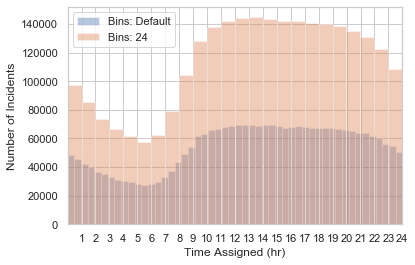

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(t_s, hist=True, kde=False, rug=False, label='Bins: Default')
sns.distplot(t_s, hist=True, kde=False, rug=False, bins=24, label='Bins: 24')
plt.xticks(np.arange(1,25))
plt.xlim(0,24)
plt.xlabel("Time Assigned (hr)")
plt.ylabel("Number of Incidents")
plt.legend()
plt.show()

***Based on 24hr bins***

In [279]:
import collections
from collections import Counter

In [293]:
first_assign_hr = collections.Counter(data["FIRST_ASSIGNMENT_Hour"])
first_assign_hr #total number of assignment hrs grouped per hour bin

Counter({23: 108449,
         22: 122406,
         21: 130952,
         20: 135093,
         19: 138544,
         18: 140035,
         17: 140923,
         16: 142417,
         15: 142324,
         14: 143194,
         13: 144757,
         12: 144455,
         11: 142434,
         10: 138060,
         9: 127910,
         8: 104644,
         7: 79463,
         6: 62577,
         5: 57214,
         4: 61729,
         2: 73801,
         1: 85358,
         0: 97452,
         3: 66479})

In [294]:
tot_first_assign_hr = sum(first_assign_hr.values())
tot_first_assign_hr #total number of assignment hrs

2730670

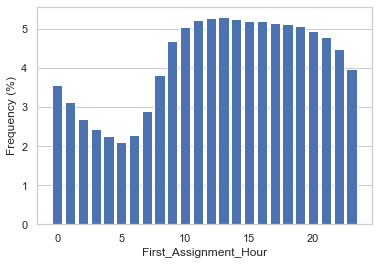

In [295]:
first_assign_hr = {k: (v*100) / tot_first_assign_hr for k, v in first_assign_hr.items()} #mult by 100 to turn into percent
plt.bar(first_assign_hr.keys(),first_assign_hr.values())
plt.grid(axis = 'x')
plt.xlabel("First_Assignment_Hour")
plt.ylabel("Frequency (%)")
plt.show()

***INCIDENT TRAVEL TIME vs TIME ASSIGNED***

In [296]:
import warnings
warnings.filterwarnings("ignore")

In [297]:
#Travel Response time over every incident time
plt.figure(figsize =(20,10))
plt.scatter(data["FIRST_ASSIGNMENT_DATETIME"],data['INCIDENT_TRAVEL_TM_SECONDS_QY'])
plt.xlabel("FIRST_ASSIGNMENT_DATETIME")
plt.ylabel("INCIDENT_TRAVEL_TM_SECONDS")
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize =(20,10))
plt.scatter((data["FIRST_ASSIGNMENT_DATETIME"].dt.hour+data["FIRST_ASSIGNMENT_DATETIME"].dt.minute/60+(data["FIRST_ASSIGNMENT_DATETIME"].dt.second/60/100)
),data['INCIDENT_TRAVEL_TM_SECONDS_QY'])
plt.xlabel("Time Assigned (hr)")
plt.ylabel("INCIDENT_TRAVEL_TM_SECONDS")
plt.show()

***INCIDENT TRAVEL TIME (all data)***

Incident travel times are comprised of many outliers. We will need to perform data reduction to get rid of some outliers without introducing bias in the model. We can look at the statistics produced based on boxplots. Deleting incidents with travel times > 2hrs does not change any of the statistics. There are only 296 incidents with > 2hrs travel times.

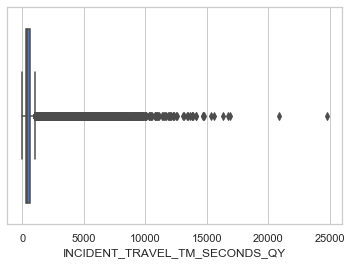

In [298]:
sns.boxplot(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])


In [299]:
data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe()

count    2.730670e+06
mean     4.890990e+02
std      3.646019e+02
min      1.000000e+00
25%      2.850000e+02
50%      4.060000e+02
75%      5.810000e+02
max      2.476500e+04
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [300]:
##calculating outliers; any travel times greater than this in seconds
data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['75%']+1.5*(data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['75%']-data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['25%'])

1025.0

In [301]:
#Count num of instances that have travel response times > 1033 s (outliers)
data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 1033].count()['INCIDENT_TRAVEL_TM_SECONDS_QY']

158325

***Incident Travel Time (smaller window)***

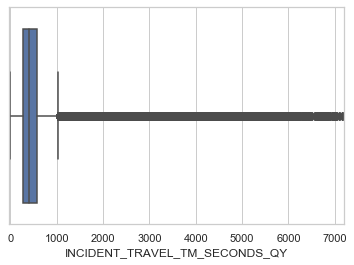

In [302]:
sns.set(style = "whitegrid")
plt.xlim(-20,7200)
sns.boxplot(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])


***Incident Travel Time without T> 2hrs***

In [303]:
#Count num of instances that have travel response time greater than 2 hours
data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 7200].count()['INCIDENT_TRAVEL_TM_SECONDS_QY']

213

In [304]:
#Drop rows where T>2hrs
t_condensed = data.drop(data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 7200].index)

In [305]:
#create series with just T>2hrs
t_condensed = t_condensed['INCIDENT_TRAVEL_TM_SECONDS_QY']

In [306]:
t_condensed.head()

0    453.0
1    303.0
2    109.0
3    414.0
4    888.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [307]:
#check if 296 rows were deleted
t_condensed.shape

(2730457,)

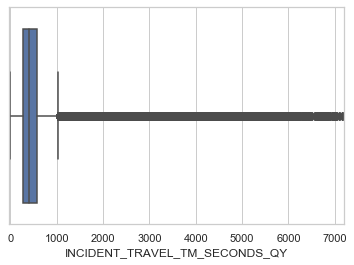

In [308]:
sns.set(style = "whitegrid")
plt.xlim(-20,7200)
sns.boxplot(t_condensed)


In [309]:
#deleting T>2hrs did not change distribution by much
t_condensed.describe()

count    2.730457e+06
mean     4.883979e+02
std      3.552247e+02
min      1.000000e+00
25%      2.850000e+02
50%      4.060000e+02
75%      5.810000e+02
max      7.195000e+03
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

***Incident Travel Time where T>2hr values occur***

Looking at where Incident travel times are >2hrs, it is very random - no specific patterns except some unusal behaviour on Nov 15, 2018. After further inspection, there was a significant snowstorm that day causing major delays.

In [310]:
t_outliers = data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 7200]

In [311]:
t_outliers.shape

(213, 28)

In [312]:
t_outliers.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
14756,182501283,2018-09-07 09:37:16,29,4,2018-09-07 09:37:33,17,2018-09-07 09:37:41,2018-09-07 11:38:09,7253.0,7236.0,0,1,12,11201.0,84.0,33.0,302.0,15.0,7.0,0,9,9,9,9,9,9,11,9
56069,172900040,2017-10-17 00:15:23,30,7,2017-10-17 00:15:34,11,2017-10-17 00:15:42,2017-10-17 04:35:47,15624.0,15613.0,0,1,12,11201.0,88.0,35.0,302.0,13.0,8.0,0,0,10,0,10,0,10,4,10
82614,170762551,2017-03-17 14:35:11,30,7,2017-03-17 14:35:50,39,2017-03-17 14:36:02,2017-03-17 16:54:55,8384.0,8345.0,1,1,12,11238.0,78.0,35.0,308.0,13.0,9.0,0,14,3,14,3,14,3,16,3
189514,181801570,2018-06-29 11:02:18,30,7,2018-06-29 11:03:02,44,2018-06-29 11:05:48,2018-06-29 14:31:56,12578.0,12534.0,0,3,28,11101.0,108.0,26.0,402.0,24.0,14.0,0,11,6,11,6,11,6,14,6
236271,173091193,2017-11-05 08:05:14,44,5,2017-11-05 08:05:20,6,2017-11-05 08:05:28,2017-11-05 11:35:19,12605.0,12599.0,0,3,28,11109.0,108.0,26.0,402.0,30.0,12.0,0,8,11,8,11,8,11,11,11


In [336]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
import datetime

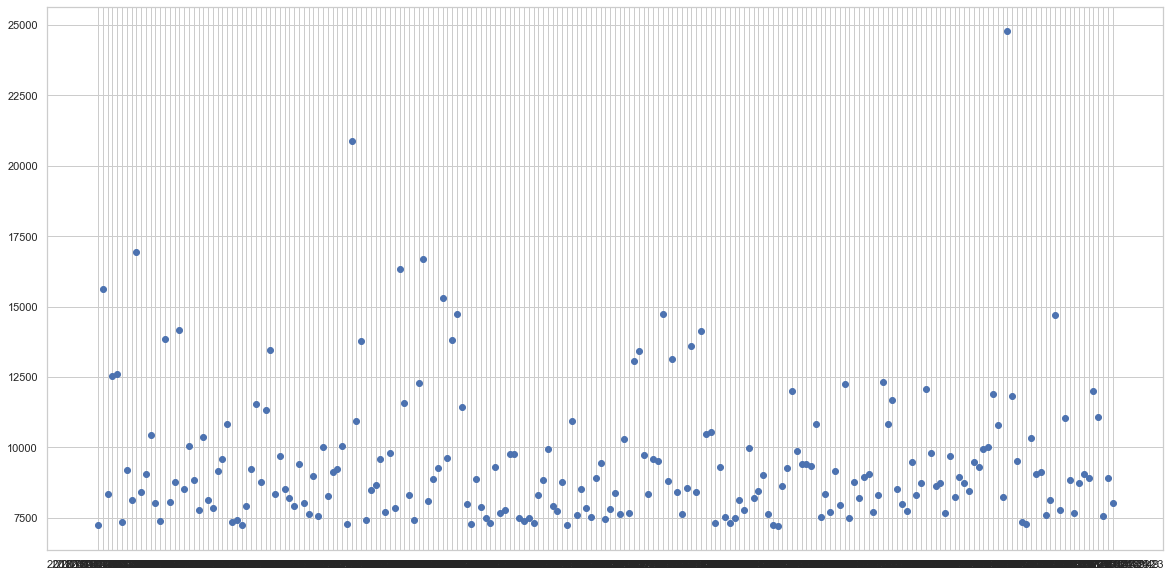

In [356]:
plt.figure(figsize =(20,10))
ax = fig.add_subplot(1,1,1)  

plt.scatter(t_outliers["FIRST_ASSIGNMENT_DATETIME"],t_outliers['INCIDENT_TRAVEL_TM_SECONDS_QY'])

***What is happening Nov 15, 2018?***

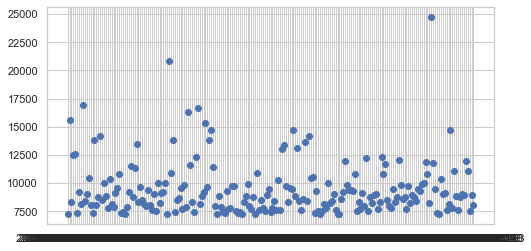

In [353]:
plt.figure(figsize =(8,4))
plt.scatter(t_outliers["FIRST_ASSIGNMENT_DATETIME"],t_outliers['INCIDENT_TRAVEL_TM_SECONDS_QY'])
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

In [343]:
res = t_outliers.loc[(t_outliers["FIRST_ASSIGNMENT_DATETIME"]>'2018-11-14 00:00:00')&(t_outliers["FIRST_ASSIGNMENT_DATETIME"]<'2018-11-16 00:00:00') ]


In [344]:
res.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month
770902,183192963,2018-11-15 16:59:03,44,5,2018-11-15 16:59:35,32,2018-11-15 17:03:38,2018-11-15 22:47:30,20907.0,20875.0,1,0,2,10472.0,43.0,17.0,209.0,12.0,15.0,0,16,11,16,11,17,11,22,11
940698,183194424,2018-11-15 21:57:32,24,2,2018-11-15 22:00:08,156,2018-11-15 22:00:26,2018-11-16 00:43:33,9961.0,9805.0,0,0,1,10460.0,48.0,15.0,206.0,12.0,15.0,0,21,11,22,11,22,11,0,11
940718,183193792,2018-11-15 19:30:24,42,3,2018-11-15 19:30:41,17,2018-11-15 19:30:50,2018-11-15 21:41:23,7859.0,7842.0,0,0,1,10453.0,46.0,14.0,205.0,9.0,15.0,0,19,11,19,11,19,11,21,11
940720,183193783,2018-11-15 19:28:53,81,6,2018-11-15 21:55:44,8811,2018-11-15 21:55:54,2018-11-16 02:27:50,25137.0,16326.0,1,0,1,10457.0,48.0,15.0,206.0,10.0,15.0,0,19,11,21,11,21,11,2,11
940721,183193760,2018-11-15 19:24:35,42,3,2018-11-15 19:24:54,19,2018-11-15 19:25:14,2018-11-15 22:37:40,11585.0,11566.0,1,0,1,10460.0,48.0,17.0,206.0,12.0,15.0,0,19,11,19,11,19,11,22,11


***TRAVEL TIME BINNED***

Further inspecting travel times, the data will need to be binned to view any useful trends. Binning the data every 5 min increment until 30min is useful. Based on statistics, any values > ~18min are considered to be outliers. It is still important to look at values up to ~30min which are still possibly valid. We can also group all incident travel times > 30min, and all nan values to see the distributions. We can look at the "global" distribution across NYC, and then the "local" distributions across each borough. Although we can see the distribution of travel times in each borough, it does not show us the corresponding severity level which is important to know if EMS reached the incident within a "reasonable" amount of time. We can plot each time travel bin with their corresponding initial severity level codes to see how they relate. We should expect lower initial severity levels (ie. 1,2..) to have much quicker travel times, and higher initial severity levels (ie. 7, 8, 9...) should have slower severity level times because EMS knew they were not to be prioritized over the more severe cases.

In [358]:
bins = [0,5*60,10*60,15*60,20*60,25*60,30*60,max(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])]

In [361]:
labels = [1,2,3,4,5,6,7]

In [362]:
data["Travel_Time_Code"]=pd.cut(data['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins=bins,labels=labels)

In [363]:
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Month,Travel_Time_Code
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0,23,12,23,12,0,1,0,1,2
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,23,12,23,12,23,12,23,12,2
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0,23,12,23,12,23,12,23,12,1
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0,23,12,23,12,23,12,23,12,2
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0,23,12,23,12,23,12,23,12,3


***ALL NYC***

In [364]:
travel_nyc = collections.Counter(data["Travel_Time_Code"])
tot_travel_nyc = sum(travel_nyc.values()) #counts of each travel time code
travel_nyc = sorted(travel_nyc.items()) #sort so it lines up with the labels
travel_nyc

[(1, 769137),
 (2, 1329877),
 (3, 404259),
 (4, 122975),
 (5, 50222),
 (6, 23348),
 (7, 30852)]

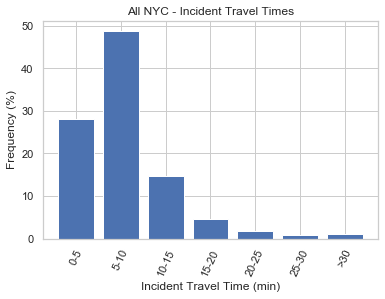

In [365]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins)-1)])

ax.bar(idx, [x[1]*100/tot_travel_nyc for x in travel_nyc])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("All NYC - Incident Travel Times")

plt.show()

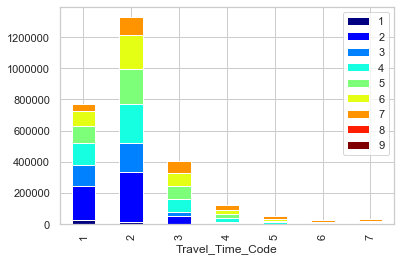

In [366]:
cmp = plt.cm.get_cmap('jet')

travel_nyc_code = data.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_nyc_code_sum = travel_nyc_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_nyc_code.reindex(index=travel_nyc_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap = cmp)
plt.legend(loc=1)
plt.show()

***Brooklyn***

In [367]:
travel_bk = collections.Counter(data[data["BOROUGH"]==1].Travel_Time_Code)
tot_travel_bk = sum(travel_bk.values())
travel_bk = sorted(list(travel_bk.items()))
travel_bk

[(1, 208345),
 (2, 371684),
 (3, 118001),
 (4, 37738),
 (5, 15633),
 (6, 7248),
 (7, 8936)]

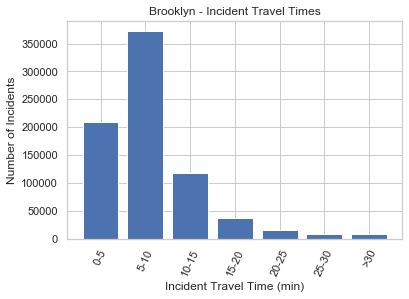

In [368]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30","nan")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins)-1)])

ax.bar(idx, [x[1] for x in travel_bk])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Number of Incidents')
plt.title("Brooklyn - Incident Travel Times")

plt.show()

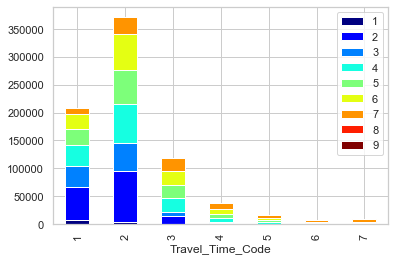

In [369]:
travel_bk_code = data.loc[data["BOROUGH"]==1] #filter specifically for rows only with BK first
travel_bk_code = travel_bk_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_bk_code_sum = travel_bk_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_bk_code.reindex(index=travel_bk_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Bronx***

In [370]:
travel_brx = collections.Counter(data[data["BOROUGH"]==0].Travel_Time_Code)
tot_travel_brx = sum(travel_brx.values())
travel_brx = sorted(travel_brx.items())
travel_brx

[(1, 160085),
 (2, 316093),
 (3, 105633),
 (4, 32632),
 (5, 13524),
 (6, 6352),
 (7, 8254)]

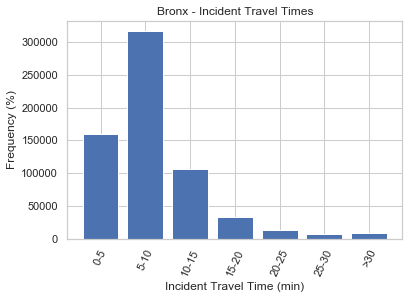

In [371]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins)-1)])

ax.bar(idx, [x[1] for x in travel_brx])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Bronx - Incident Travel Times")

plt.show()

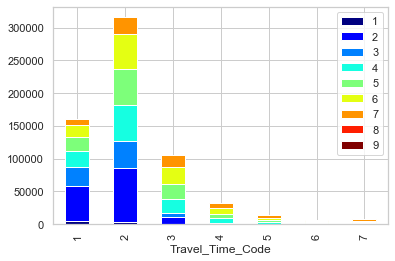

In [372]:
travel_brx_code = data.loc[data["BOROUGH"]==0] #filter specifically for rows only with BK first
travel_brx_code = travel_brx_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_brx_code_sum = travel_brx_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_brx_code.reindex(index=travel_brx_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Manhattan***

In [373]:
travel_mht = collections.Counter(data[data["BOROUGH"]==2].Travel_Time_Code)
tot_travel_mht = sum(travel_mht.values())
travel_mht = sorted(travel_mht.items())
travel_mht

[(1, 203947),
 (2, 306698),
 (3, 98621),
 (4, 33585),
 (5, 14765),
 (6, 7245),
 (7, 11252)]

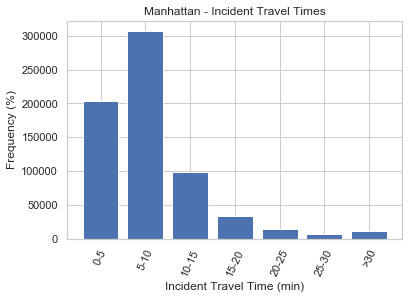

In [374]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins)-1)])

ax.bar(idx, [x[1] for x in travel_mht])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Manhattan - Incident Travel Times")

plt.show()

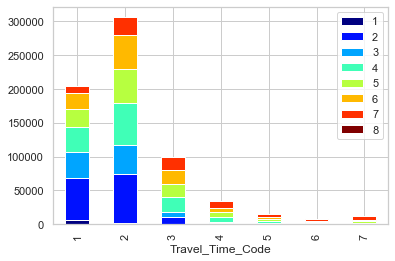

In [375]:
travel_mht_code = data.loc[data["BOROUGH"]==2] #filter specifically for rows only with BK first
travel_mht_code = travel_mht_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_mht_code_sum = travel_mht_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_mht_code.reindex(index=travel_mht_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Queens***

In [376]:
travel_queens = collections.Counter(data[data["BOROUGH"]==3].Travel_Time_Code)
tot_travel_queens = sum(travel_queens.values())
travel_queens = sorted(travel_queens.items()) #move nan row to end
travel_queens

[(1, 157991),
 (2, 276171),
 (3, 69736),
 (4, 16188),
 (5, 5440),
 (6, 2151),
 (7, 2106)]

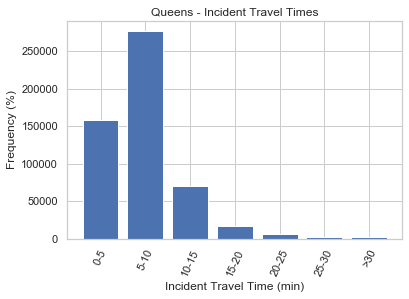

In [377]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins)-1)])

ax.bar(idx, [x[1] for x in travel_queens])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Queens - Incident Travel Times")

plt.show()

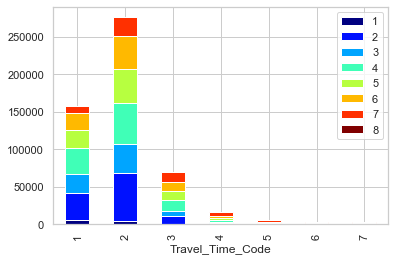

In [378]:
travel_queens_code = data.loc[data["BOROUGH"]==3] #filter specifically for rows only with BK first
travel_queens_code = travel_queens_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_queens_code_sum = travel_queens_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_queens_code.reindex(index=travel_queens_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***Staten Island***

In [379]:
travel_st = collections.Counter(data[data["BOROUGH"]==4].Travel_Time_Code)
tot_travel_st = sum(travel_st.values())
travel_st = sorted(travel_st.items()) #move nan row to end
travel_st

[(1, 38769), (2, 59231), (3, 12268), (4, 2832), (5, 860), (6, 352), (7, 304)]

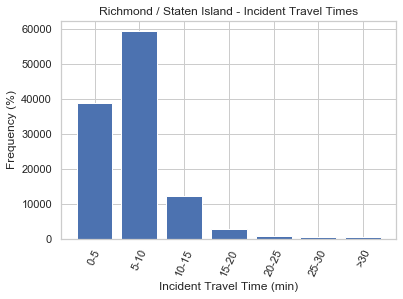

In [380]:
bars = ("0-5","5-10","10-15","15-20","20-25","25-30",">30")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (6,4))
idx = np.asarray([i for i in range(len(bins)-1)])

ax.bar(idx, [x[1] for x in travel_st])
ax.set_xticks(idx)
ax.set_xticklabels(bars, rotation=65)
ax.set_xlabel('Incident Travel Time (min)')
ax.set_ylabel('Frequency (%)')
plt.title("Richmond / Staten Island - Incident Travel Times")

plt.show()

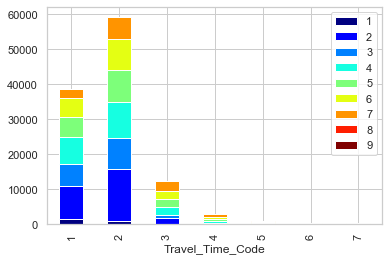

In [381]:
travel_st_code = data.loc[data["BOROUGH"]==4] #filter specifically for rows only with BK first
travel_st_code = travel_st_code.groupby(["Travel_Time_Code","INITIAL_SEVERITY_LEVEL_CODE"]).size()
travel_st_code_sum = travel_st_code.groupby(level=[0]).sum().sort_values(ascending=False).sort_index(axis=0)
travel_st_code.reindex(index=travel_st_code_sum.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)
plt.legend(loc=1)
plt.show()

***BOROUGH***

In [404]:
borough = collections.Counter(data["BOROUGH"])
tot_borough = sum(borough.values())

In [405]:
borough

Counter({1: 767585, 2: 676113, 3: 529783, 0: 642573, 4: 114616})

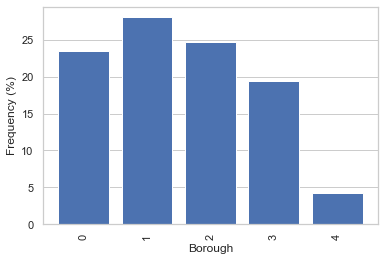

In [406]:
borough = {k: (v*100) / tot_borough for k, v in borough.items()} #mult by 100 to turn into percent
plt.bar(borough.keys(),borough.values())
plt.grid(axis = 'x')
plt.xticks(rotation = 90)
plt.xlabel("Borough")
plt.ylabel("Frequency (%)")
plt.show()

***INITAL SEVERITY LEVEL***

In [407]:
severity_initial = collections.Counter(data["INITIAL_SEVERITY_LEVEL_CODE"])
tot_severity_initial = sum(severity_initial.values())

In [408]:
severity_initial

Counter({2: 598508,
         6: 451072,
         7: 306348,
         3: 356071,
         4: 524986,
         5: 453222,
         1: 40330,
         8: 130,
         9: 3})

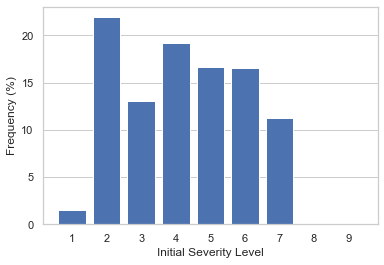

In [409]:
severity_initial = {k: (v*100) / tot_severity_initial for k, v in severity_initial.items()}#mult by 100 to turn into perc
plt.bar(severity_initial.keys(),severity_initial.values())
plt.grid(axis = 'x')
plt.xlabel("Initial Severity Level")
plt.xticks(np.arange(1,10))
plt.ylabel("Frequency (%)")
plt.show()

***INCIDENT DISPOSITIONS*** 

Removed incident dispositions because of data leakage

In [414]:
from math import isnan
disp = collections.Counter(data["INCIDENT_DISPOSITION_CODE"])
tot_disp = sum(disp.values())

KeyError: 'INCIDENT_DISPOSITION_CODE'

In [ ]:
disp

In [ ]:
disp = {k: (v*100) / tot_disp for k, v in disp.items()}#mult by 100 to turn into percent
plt.bar(disp.keys(),disp.values())
plt.grid(axis = 'x')
plt.xticks([82,83,87,90,91,92,93,94,95,96])
plt.xlabel("Incident Disposition Code")
plt.ylabel("Frequency (%)")
plt.show()

***HELD_INDICATOR***

In [410]:
held_ind = collections.Counter(data["HELD_INDICATOR"])
tot_held_ind = sum(held_ind.values())
held_ind

Counter({0: 2608339, 1: 122331})

In [411]:
tot_held_ind

2730670

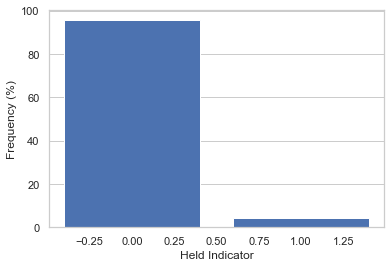

In [412]:
held_ind = {k: (v*100) / tot_held_ind for k, v in held_ind.items()}#mult by 100 to turn into percent
plt.bar(held_ind.keys(),held_ind.values())
plt.grid(axis = 'x')
plt.xlabel("Held Indicator")
plt.ylabel("Frequency (%)")
plt.show()

***STANDBY_INDICATOR***

Removed Standby Indicator since we removed all instances of standby.

In [413]:
stby_ind = collections.Counter(data["STANDBY_INDICATOR"])
tot_stby_ind = sum(stby_ind.values())
stby_ind

KeyError: 'STANDBY_INDICATOR'

In [ ]:
tot_stby_ind

In [ ]:
stby_ind = {k: (v*100) / tot_stby_ind for k, v in stby_ind.items()}#mult by 100 to turn into percent
plt.bar(stby_ind.keys(),stby_ind.values())
plt.grid(axis = 'x')
plt.xlabel("Standby Indicator")
plt.ylabel("Frequency (%)")
plt.show()

***SPECIAL EVENT INDICATOR***

Removed special event indicator since we removed all instances of special events.

In [415]:
spevent_ind = collections.Counter(data["SPECIAL_EVENT_INDICATOR"])
tot_spevent_ind = sum(spevent_ind.values())
spevent_ind

KeyError: 'SPECIAL_EVENT_INDICATOR'

In [ ]:
tot_spevent_ind 

In [ ]:
spevent_ind = {k: (v*100) / tot_spevent_ind for k, v in spevent_ind.items()}#mult by 100 to turn into percent
plt.bar(spevent_ind.keys(),spevent_ind.values())
plt.grid(axis = 'x')
plt.xlabel("Special Event Indicator")
plt.ylabel("Frequency (%)")
plt.show()

***INCIDENT DISPATCH AREA***

In [416]:
disp_area = collections.Counter(data["INCIDENT_DISPATCH_AREA"])
tot_disp_area = sum(disp_area.values())
disp_area

Counter({12: 91516,
         25: 60192,
         28: 143590,
         7: 116639,
         16: 128623,
         10: 191689,
         27: 30681,
         2: 127326,
         23: 38581,
         1: 194139,
         11: 72491,
         14: 80469,
         13: 111291,
         30: 57600,
         24: 144175,
         0: 159617,
         9: 87493,
         3: 75829,
         8: 96951,
         21: 36825,
         17: 53483,
         15: 126045,
         18: 70772,
         20: 81957,
         29: 61024,
         22: 74831,
         4: 85395,
         32: 14191,
         26: 51329,
         19: 22915,
         31: 42742,
         33: 220,
         6: 41,
         34: 7,
         5: 1})

In [417]:
tot_disp_area

2730670

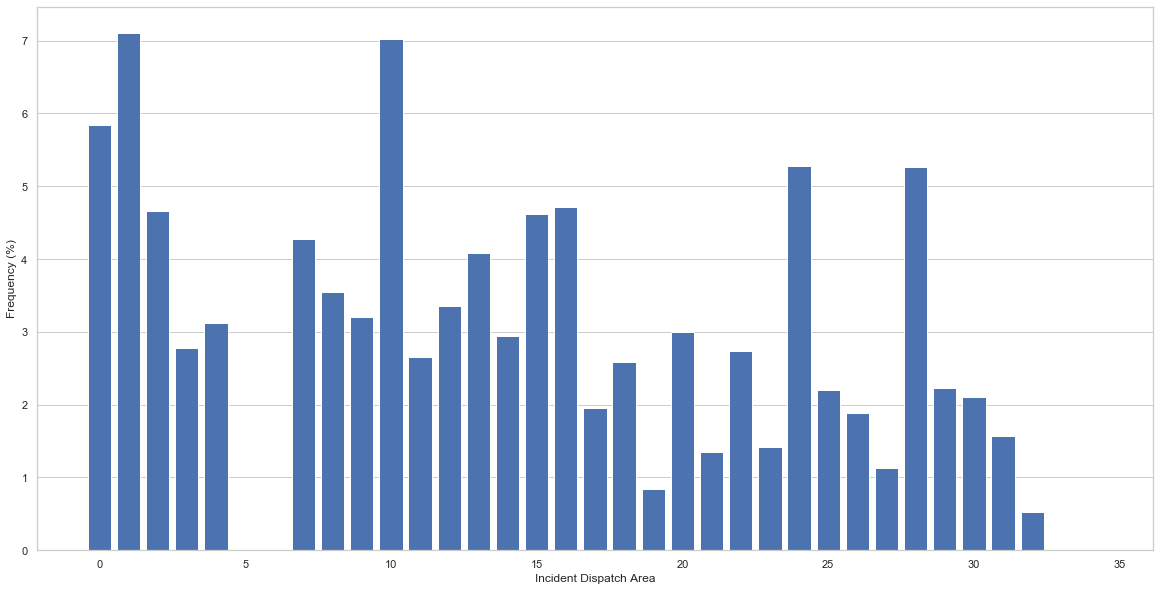

In [418]:
disp_area = {k: (v*100) / tot_disp_area for k, v in disp_area.items()}#mult by 100 to turn into percent

plt.figure(figsize =(20,10))
plt.bar(disp_area.keys(),disp_area.values())
plt.grid(axis = 'x')
plt.xlabel("Incident Dispatch Area")
plt.ylabel("Frequency (%)")
plt.show()

In [ ]:
new = data

In [ ]:
new1 = new.groupby('INCIDENT_DISPATCH_AREA')['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe()

In [ ]:
new1["Outliers"] = new1["75%"]+1.5*(new1["75%"]-new1["25%"])

In [ ]:
new1

In [ ]:
data["FIRST_ASSIGNMENT_DATETIME"].dt.month[:5]

In [ ]:
plt.figure(figsize =(20,10))

x1 = list(data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x2 = list(data[data['Travel_Time_Code']==2]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x3 = list(data[data['Travel_Time_Code']==3]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x4 = list(data[data['Travel_Time_Code']==4]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x5 = list(data[data['Travel_Time_Code']==5]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x6 = list(data[data['Travel_Time_Code']==6]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x7 = list(data[data['Travel_Time_Code']==7]['FIRST_ASSIGNMENT_DATETIME'].dt.month)

# Assign colors for each airline and the names
names = ["0-5","5-10","10-15","15-20","20-25","25-30",">30"]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5,x6,x7],
         label=names)

# Plot formatting
plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Side-by-Side Histogram per Month')

In [ ]:
x1 = list(data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x2 = list(data[data['Travel_Time_Code']==2]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x3 = list(data[data['Travel_Time_Code']==3]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x4 = list(data[data['Travel_Time_Code']==4]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x5 = list(data[data['Travel_Time_Code']==5]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x6 = list(data[data['Travel_Time_Code']==6]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
x7 = list(data[data['Travel_Time_Code']==7]['FIRST_ASSIGNMENT_DATETIME'].dt.month)



In [ ]:
a = data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month
a.unique()

In [ ]:
# x1 = list(data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month)
a = data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month


In [ ]:
from collections import Counter

X1 = pd.DataFrame([Counter(a).keys(),Counter(a).values() ])
X1

In [ ]:
x1 = data[data['Travel_Time_Code']==1]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x2 = data[data['Travel_Time_Code']==2]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x3 = data[data['Travel_Time_Code']==3]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x4 = data[data['Travel_Time_Code']==4]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x5 = data[data['Travel_Time_Code']==5]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x6 = data[data['Travel_Time_Code']==6]['FIRST_ASSIGNMENT_DATETIME'].dt.month
x7 = data[data['Travel_Time_Code']==7]['FIRST_ASSIGNMENT_DATETIME'].dt.month

X1 = pd.DataFrame([Counter(x1).keys(),Counter(x1).values() ])
X2 = pd.DataFrame([Counter(x2).keys(),Counter(x2).values() ])
X3 = pd.DataFrame([Counter(x3).keys(),Counter(x3).values() ])
X4 = pd.DataFrame([Counter(x4).keys(),Counter(x4).values() ])
X5 = pd.DataFrame([Counter(x5).keys(),Counter(x5).values() ])
X6 = pd.DataFrame([Counter(x6).keys(),Counter(x6).values() ])
X7 = pd.DataFrame([Counter(x7).keys(),Counter(x7).values() ])


In [ ]:
X1 = pd.DataFrame([Counter(x1).keys(),Counter(x1).values() ])
X2 = pd.DataFrame([Counter(x2).keys(),Counter(x2).values() ])
X3 = pd.DataFrame([Counter(x3).keys(),Counter(x3).values() ])
X4 = pd.DataFrame([Counter(x4).keys(),Counter(x4).values() ])
X5 = pd.DataFrame([Counter(x5).keys(),Counter(x5).values() ])
X6 = pd.DataFrame([Counter(x6).keys(),Counter(x6).values() ])
X7 = pd.DataFrame([Counter(x7).keys(),Counter(x7).values() ])


In [ ]:
frame_combined = pd.concat([X1 , X2], ignore_index=False)
frame_combined

In [ ]:
X1 = pd.Series(Counter(x1).values(), index=Counter(x1).keys())

In [ ]:
X1

***MAPS***

In [ ]:
test = data.groupby("ZIPCODE")["INCIDENT_RESPONSE_SECONDS_QY"].mean()

In [ ]:
res = pd.DataFrame(test)

In [ ]:
res = res.drop(res.index[0])

In [ ]:
res.drop(res.tail(1).index,inplace=True)

In [ ]:
test_time = res["INCIDENT_RESPONSE_SECONDS_QY"].tolist()

In [ ]:
test_index = res.index.tolist()

In [ ]:
test_index

In [ ]:
pip install pyshp

In [ ]:
pip install geopandas

In [ ]:
conda install descartes

In [ ]:
import shapefile as shp
import geopandas as gpd
%matplotlib inline

In [ ]:
sf = shp.Reader('ZIP_CODE_040114.shp')

In [ ]:
len(sf.shapes())

In [ ]:
sf.records()[1]

In [ ]:
#used from Towards Data Science blog post, https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [ ]:
df = read_shapefile(sf)
df.shape

In [ ]:
df.sample(10)

In [ ]:
#used from Towards Data Science blog post, https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
    
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
plot_map(sf)

In [ ]:
def calc_color(data, color=None):
        if color   == 1: color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return (color_ton, bins)

In [ ]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
def plot_zipcode_data(sf, title, zipcode, data=None, color=None, print_id=False):

    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    zipcode_id = []
    for i in zipcode:
        zipcode_id.append(df[df.ZIPCODE == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, zipcode_id, print_id, color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9))

In [ ]:
zipcode_id = []
for i in test_index:
    zipcode_id.append(df[df.ZIPCODE == i].index.get_values()[0])

In [ ]:
df[df.ZIPCODE == "10005"].index.get_values()[0]

In [ ]:
print_id = True
color_pallete = 1 

In [ ]:
plot_zipcode_data(sf, 'NYC', test_index, test_time, color_pallete, print_id)